Importing Libraries

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt

Loading Dataset

In [42]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Train Images : ", train_images.shape)
print("Train Labels : ", train_labels.shape)
print("Test Images : ", test_images.shape)
print("Test Labels : ", test_labels.shape)

Train Images :  (60000, 28, 28)
Train Labels :  (60000,)
Test Images :  (10000, 28, 28)
Test Labels :  (10000,)


Preprocessing

In [43]:
train_images = train_images.reshape(60000, 28*28)
test_images = test_images.reshape(10000, 28*28)

In [44]:
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

In [45]:
train_images /= 255
test_images /= 255

In [46]:
classes = 10

train_labels = to_categorical(train_labels, num_classes=classes)
test_labels = to_categorical(test_labels, num_classes=classes)

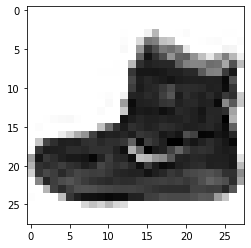

In [47]:
plt.imshow(train_images[0].reshape(28, 28), cmap='binary')

In [48]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [49]:
labels = {0:"T-shirt/top",
1:"Trouser",
2:"Pullover",
3:"Dress",
4:"Coat",
5:"Sandal",
6:"Shirt",
7:"Sneaker",
8:"Bag",
9:"Ankle boot"}

Model

Model_1 : One Dense Layer

In [ ]:
model_one = Sequential()

model_one.add(Dense(units=1000, input_shape=(784,), activation=tf.nn.relu))
model_one.add(Dropout(rate=0.2))

model_one.add(Dense(classes, activation=tf.nn.softmax))

model_one.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model_2 : Two Dense Layers

In [ ]:
model_two = Sequential()

model_two.add(Dense(units=1000, input_shape=(784,), activation=tf.nn.relu))
model_two.add(Dropout(rate=0.2))

model_two.add(Dense(units=1000, activation=tf.nn.relu))
model_two.add(Dropout(rate=0.2))


model_two.add(Dense(classes, activation=tf.nn.softmax))

model_two.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model_3 : Three Dense Layers

In [50]:
model_three = Sequential()

model_three.add(Dense(units=1000, input_shape=(784,), activation=tf.nn.relu))
model_three.add(Dropout(rate=0.2))

model_three.add(Dense(units=1000, activation=tf.nn.relu))
model_three.add(Dropout(rate=0.2))

model_three.add(Dense(units=500, activation=tf.nn.relu))
model_three.add(Dropout(rate=0.35))

model_three.add(Dense(classes, activation=tf.nn.softmax))

model_three.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Models Training

In [ ]:
# First Model
history_one = model_one.fit(train_images, train_labels,
                            epochs=10,
                            validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4916 - accuracy: 0.8239 - val_loss: 0.4431 - val_accuracy: 0.8383
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3824 - accuracy: 0.8603 - val_loss: 0.4132 - val_accuracy: 0.8484
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3487 - accuracy: 0.8712 - val_loss: 0.3687 - val_accuracy: 0.8640
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3290 - accuracy: 0.8783 - val_loss: 0.3510 - val_accuracy: 0.8723
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3105 - accuracy: 0.8855 - val_loss: 0.3360 - val_accuracy: 0.8781
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2981 - accuracy: 0.8892 - val_loss: 0.3438 - val_accuracy: 0.8769
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2900 - accuracy: 0.8919 - val_loss: 0.3461 - val_accuracy

In [ ]:
score_one = model_one.evaluate(test_images, test_labels)
print("Test Loss : ", score_one[0])
print("Test Accuracy : ", score_one[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3337 - accuracy: 0.8805
Test Loss :  0.33371224999427795
Test Accuracy :  0.8805000185966492


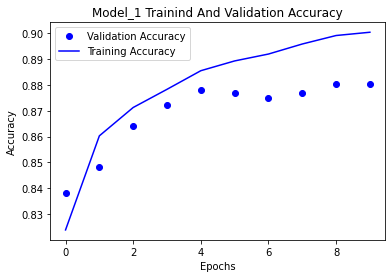

In [ ]:
epochs_one = range(len(history_one.history['accuracy']))
plt.plot(epochs_one, history_one.history['val_accuracy'], 'bo', label = 'Validation Accuracy')
plt.plot(epochs_one, history_one.history['accuracy'], 'b', label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model_1 Trainind And Validation Accuracy")
plt.legend()

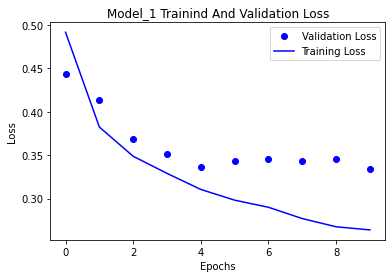

In [ ]:
epochs_one = range(len(history_one.history['accuracy']))
plt.plot(epochs_one, history_one.history['val_loss'], 'bo', label = 'Validation Loss')
plt.plot(epochs_one, history_one.history['loss'], 'b', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model_1 Trainind And Validation Loss")
plt.legend()

In [ ]:
# Second Model
history_two = model_two.fit(train_images, train_labels,
                            epochs=10,
                            validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4991 - accuracy: 0.8192 - val_loss: 0.4298 - val_accuracy: 0.8395
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3919 - accuracy: 0.8564 - val_loss: 0.3756 - val_accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3644 - accuracy: 0.8660 - val_loss: 0.3687 - val_accuracy: 0.8678
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3474 - accuracy: 0.8723 - val_loss: 0.3674 - val_accuracy: 0.8693
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3287 - accuracy: 0.8780 - val_loss: 0.3565 - val_accuracy: 0.8680
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3170 - accuracy: 0.8817 - val_loss: 0.3487 - val_accuracy: 0.8759
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3079 - accuracy: 0.8856 - val_loss: 0.3330 - val_accu

In [ ]:
score_two = model_two.evaluate(test_images, test_labels)
print("Test Loss : ", score_two[0])
print("Test Accuracy : ", score_two[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3646 - accuracy: 0.8755
Test Loss :  0.3645584285259247
Test Accuracy :  0.8755000233650208


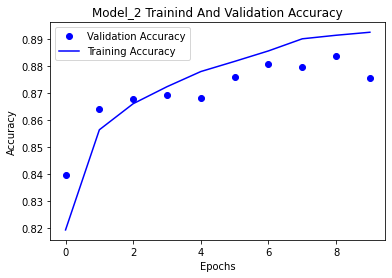

In [ ]:
epochs_two = range(len(history_two.history['accuracy']))
plt.plot(epochs_two, history_two.history['val_accuracy'], 'bo', label = 'Validation Accuracy')
plt.plot(epochs_two, history_two.history['accuracy'], 'b', label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model_2 Trainind And Validation Accuracy")
plt.legend()

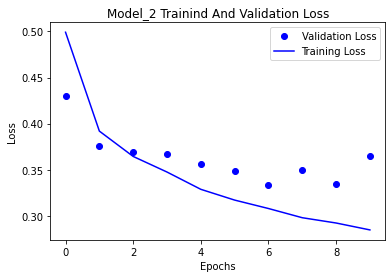

In [ ]:
epochs_two = range(len(history_two.history['accuracy']))
plt.plot(epochs_two, history_two.history['val_loss'], 'bo', label = 'Validation Loss')
plt.plot(epochs_two, history_two.history['loss'], 'b', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model_2 Trainind And Validation Loss")
plt.legend()

In [ ]:
# Third Model
history_three = model_three.fit(train_images, train_labels,
                            epochs=10,
                            validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5371 - accuracy: 0.8053 - val_loss: 0.4415 - val_accuracy: 0.8349
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4228 - accuracy: 0.8485 - val_loss: 0.3910 - val_accuracy: 0.8602
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3899 - accuracy: 0.8590 - val_loss: 0.3929 - val_accuracy: 0.8613
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3700 - accuracy: 0.8666 - val_loss: 0.3630 - val_accuracy: 0.8686
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3553 - accuracy: 0.8715 - val_loss: 0.3639 - val_accuracy: 0.8725
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3453 - accuracy: 0.8753 - val_loss: 0.3570 - val_accuracy: 0.8716
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3393 - accuracy: 0.8792 - val_loss: 0.3524 - val_ac

In [ ]:
score_three = model_three.evaluate(test_images, test_labels)
print("Test Loss : ", score_three[0])
print("Test Accuracy : ", score_three[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3546 - accuracy: 0.8775
Test Loss :  0.35462602972984314
Test Accuracy :  0.8774999976158142


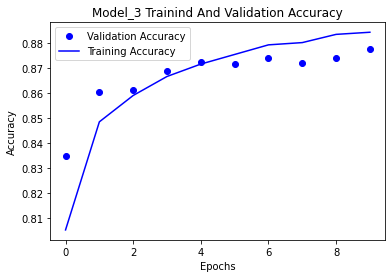

In [ ]:
epochs_three = range(len(history_three.history['accuracy']))
plt.plot(epochs_three, history_three.history['val_accuracy'], 'bo', label = 'Validation Accuracy')
plt.plot(epochs_three, history_three.history['accuracy'], 'b', label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model_3 Trainind And Validation Accuracy")
plt.legend()

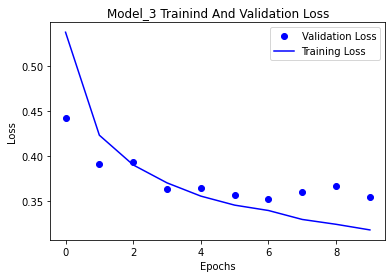

In [ ]:
epochs_three = range(len(history_three.history['accuracy']))
plt.plot(epochs_three, history_three.history['val_loss'], 'bo', label = 'Validation Loss')
plt.plot(epochs_three, history_three.history['loss'], 'b', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model_3 Trainind And Validation Loss")
plt.legend()

In [51]:
class fashionCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.35):
      print('\nLoss is low so cancelling training!')
      self.model.stop_training = True

In [53]:
callbacks = fashionCallback()
history_three_callback = model_three.fit(train_images, train_labels,
                                         epochs=10,
                                         validation_data=(test_images, test_labels),
                                         callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5348 - accuracy: 0.8069 - val_loss: 0.4119 - val_accuracy: 0.8508
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4200 - accuracy: 0.8486 - val_loss: 0.4060 - val_accuracy: 0.8495
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3843 - accuracy: 0.8606 - val_loss: 0.3877 - val_accuracy: 0.8592
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3739 - accuracy: 0.8650 - val_loss: 0.3677 - val_accuracy: 0.8661
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3538 - accuracy: 0.8722 - val_loss: 0.3751 - val_accuracy: 0.8669
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3473 - accuracy: 0.8754 - val_loss: 0.3759 - val_accuracy: 0.8701

Loss is low so cancelling training!


Result:

In this Project i have learned by performing this project that is we increase no of hidden layers in model the learning wave of model smooths gradually on the otherside i have seen that the test accuracy also gradually decreases.

Conclusion:

So according to me add more no of neurons as compared to add more no of dense layers in model.
Using Callbacks also save your model from overfitting.